In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [3]:
#Getting the path
os.getcwd()

'C:\\Users\\Shubham Buchunde\\Documents'

In [4]:
import os
os.chdir('E:\samsungRound1')

In [5]:
#Importing the dataset
data = pd.read_csv('Samsung-Dataset.csv')

In [6]:
#Getting the shape of dataframe
data.shape

(400, 2042)

In [7]:
data.head()

,ID,0,1,2,3,4,5,6,7,8,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,target
0,1460,-0.132150,0.665297,-0.064984,-0.682743,-1.670120,-2.038328,-0.545154,0.310710,1.383457,...,-1.861042,-0.547050,0.027867,0.195051,-1.528746,-0.820430,-0.520177,-0.018556,0.115196,0
1,2004,-2.340037,1.379465,-1.416908,1.058687,-0.925641,-1.997925,0.020832,0.984306,-0.941658,...,0.750263,0.337564,0.268738,0.132234,0.869958,0.020832,1.159523,1.565648,0.399690,0
2,1822,-3.305077,3.269503,1.101463,3.050656,-3.698528,-0.439945,2.060245,2.811025,1.980355,...,-0.418008,-0.462045,-0.844055,-0.304128,-2.290437,0.236861,-0.278875,-0.421502,-0.839348,0
3,2312,-2.393572,2.283466,1.314250,1.741767,-2.545204,-1.107955,3.630136,1.581411,1.489944,...,-0.766471,-0.034958,-1.036459,0.924796,-0.934358,0.755618,-0.855409,-0.651910,-1.187739,0
4,509,-2.688217,0.092939,-0.776521,1.704945,-3.512088,-0.486106,-1.069824,1.906976,2.936643,...,0.514263,-0.311293,-1.562399,-0.980406,-0.315425,-0.199459,-0.852053,-0.575964,-1.927901,1


In [8]:
#List of names of columns
data.columns

Index(['ID', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039',
       'target'],
      dtype='object', length=2042)

In [9]:
#Checking the datatype of each column
data.dtypes

ID          int64
0         float64
1         float64
2         float64
3         float64
           ...   
2036      float64
2037      float64
2038      float64
2039      float64
target      int64
Length: 2042, dtype: object

In [10]:
data.describe()

,ID,0,1,2,3,4,5,6,7,8,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,400.00000
mean,1468.820000,-2.454315,1.387525,0.034654,0.693258,-1.810482,-1.280029,0.644129,0.779307,0.912637,...,-0.207837,0.475036,-0.345069,0.033433,-0.239941,0.376155,-0.184311,0.256586,-0.327967,0.50250
std,899.939362,1.723203,1.163211,1.675725,1.220413,1.502385,1.401594,1.560529,1.153789,1.656863,...,0.963188,0.957775,0.992042,1.004202,0.882522,0.993618,0.925765,0.985313,0.917378,0.50062
min,2.000000,-8.636380,-2.452950,-3.742616,-2.784115,-6.877709,-6.893295,-3.291058,-2.758156,-3.522823,...,-3.047872,-4.130720,-3.267664,-3.702843,-3.075611,-3.389549,-2.257152,-3.452195,-2.952665,0.00000
25%,688.250000,-3.460833,0.620216,-1.146328,-0.122309,-2.693573,-2.149933,-0.403202,0.030913,-0.185079,...,-0.892433,-0.131863,-1.073211,-0.633802,-0.802390,-0.312841,-0.842649,-0.387366,-0.957566,0.00000
50%,1436.500000,-2.553228,1.439364,-0.084695,0.739539,-1.816496,-1.246880,0.623940,0.801999,0.776361,...,-0.230971,0.459961,-0.347148,0.054593,-0.223795,0.412975,-0.245083,0.257920,-0.288286,1.00000
75%,2271.500000,-1.343310,2.196375,1.118133,1.638567,-0.907078,-0.326633,1.590734,1.541461,1.952983,...,0.454442,1.190605,0.299111,0.764447,0.393598,1.037827,0.465705,1.005933,0.259947,1.00000
max,3063.000000,3.072363,4.884624,6.031595,4.483555,3.759256,2.647333,7.439156,4.177622,6.046353,...,2.694651,3.107183,2.547426,2.402851,1.913114,3.116792,2.444487,2.684357,2.857924,1.00000


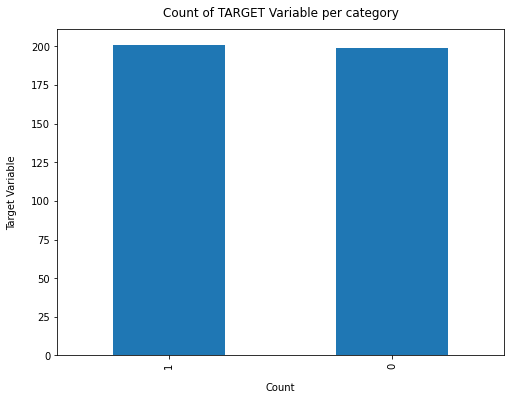

In [11]:
# Checking the data imbalanced or balanced by plotting the bar plot
data['target'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [12]:
#Value counts of target column
data['target'].value_counts()

1    201
0    199
Name: target, dtype: int64

In [13]:
# Percentage of counts available in target column
(data['target'].value_counts()/len(data['target']))*100

1    50.25
0    49.75
Name: target, dtype: float64

In [14]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2042 columns):
 #     Column  Dtype  
---    ------  -----  
 0     ID      int64  
 1     0       float64
 2     1       float64
 3     2       float64
 4     3       float64
 5     4       float64
 6     5       float64
 7     6       float64
 8     7       float64
 9     8       float64
 10    9       float64
 11    10      float64
 12    11      float64
 13    12      float64
 14    13      float64
 15    14      float64
 16    15      float64
 17    16      float64
 18    17      float64
 19    18      float64
 20    19      float64
 21    20      float64
 22    21      float64
 23    22      float64
 24    23      float64
 25    24      float64
 26    25      float64
 27    26      float64
 28    27      float64
 29    28      float64
 30    29      float64
 31    30      float64
 32    31      float64
 33    32      float64
 34    33      float64
 35    34      float64
 36    35      floa

C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


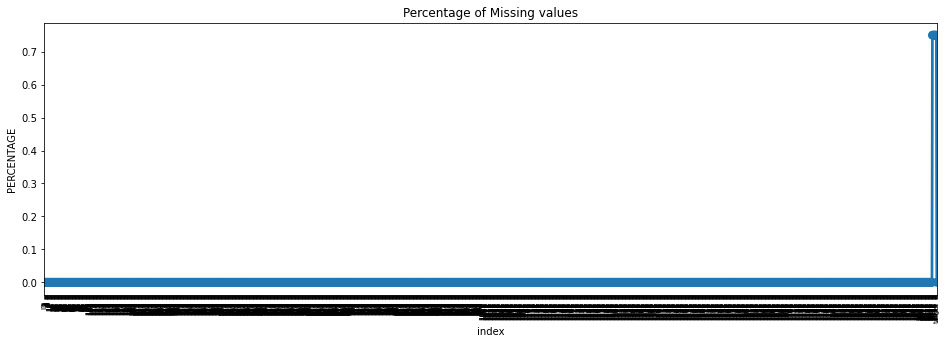

In [15]:
#Finding percentage of missing values
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [16]:
data.isnull().sum()

ID        0
0         0
1         0
2         0
3         0
         ..
2036      3
2037      3
2038      3
2039      3
target    0
Length: 2042, dtype: int64

In [17]:
#X = data.iloc[:,:2041].values
#y = data.iloc[:, -1].values

In [18]:
#X.shape , y.shape

In [19]:
#print the feature name and the percentage of missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
print(len(features_with_na))
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

10
2030 0.0075  % missing values
2031 0.0075  % missing values
2032 0.0075  % missing values
2033 0.0075  % missing values
2034 0.0075  % missing values
2035 0.0075  % missing values
2036 0.0075  % missing values
2037 0.0075  % missing values
2038 0.0075  % missing values
2039 0.0075  % missing values


In [20]:
#Finding the sum of null values per column
data.isnull().sum()

ID        0
0         0
1         0
2         0
3         0
         ..
2036      3
2037      3
2038      3
2039      3
target    0
Length: 2042, dtype: int64

In [21]:
data.loc[data ['2039'].isnull() == True]

,ID,0,1,2,3,4,5,6,7,8,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,target
106,2954,-1.029143,1.518058,-0.321229,0.163357,-3.601803,1.041713,0.688571,0.465938,1.214174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
107,1063,-4.437154,0.533476,0.388561,0.565787,-2.638810,-1.439206,1.708379,-0.183695,1.726373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
349,374,-4.077707,1.728920,2.437987,2.475241,-4.299830,-1.065706,2.540115,1.688159,2.964870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [22]:
#Filling the null values with the mean
data['2030'].fillna(value=data['2030'].mean(), inplace=True)
data['2031'].fillna(value=data['2031'].mean(), inplace=True)
data['2032'].fillna(value=data['2032'].mean(), inplace=True)
data['2033'].fillna(value=data['2033'].mean(), inplace=True)
data['2034'].fillna(value=data['2034'].mean(), inplace=True)
data['2035'].fillna(value=data['2035'].mean(), inplace=True)
data['2036'].fillna(value=data['2036'].mean(), inplace=True)
data['2037'].fillna(value=data['2037'].mean(), inplace=True)
data['2038'].fillna(value=data['2038'].mean(), inplace=True)
data['2039'].fillna(value=data['2039'].mean(), inplace=True)


In [23]:
#Dropping the Column ID which will not be useful for our classification
data.drop(columns= ['ID'], axis=1, inplace=True)

In [24]:
data.shape

(400, 2041)

In [25]:
# Plotting the correlation bar plot 
plt.figure(figsize=(700,100))
data.corr()['target'].sort_values(ascending = False).plot(kind='bar')


<AxesSubplot:>

<AxesSubplot:>

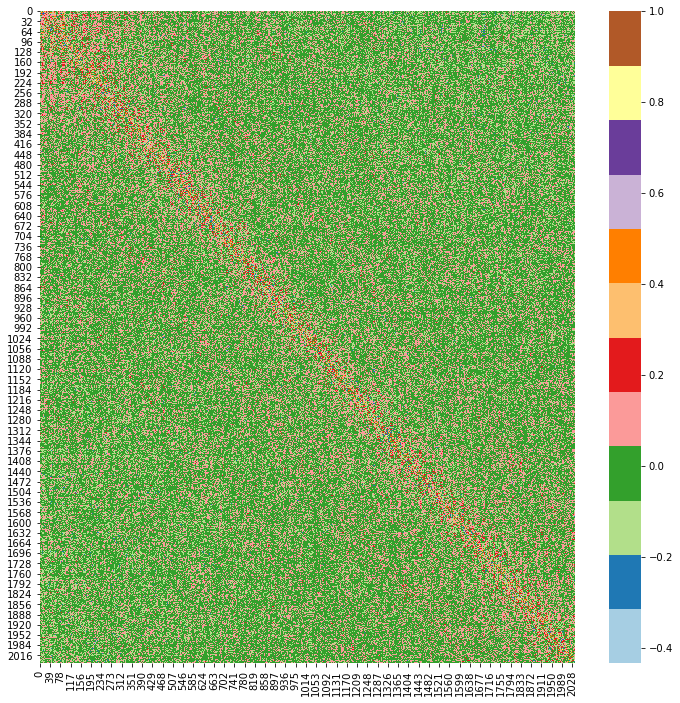

In [26]:
# Creating the heat map determinng the correlation
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap="Paired")

In [27]:
# Finding the correlation between the features
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,target
0,1.000000,0.038855,0.063052,-0.281947,0.541906,0.043693,-0.027328,-0.037246,-0.096955,-0.292210,...,-0.073081,-0.153489,-0.046122,0.022965,-0.062931,-0.167262,-0.026165,-0.020881,-0.031001,0.005272
1,0.038855,1.000000,0.033520,0.251469,-0.184442,0.278347,0.098581,0.386577,0.029735,0.109233,...,0.042965,-0.037853,0.139439,0.033531,0.048115,-0.098907,0.117348,-0.034398,0.092084,-0.043123
2,0.063052,0.033520,1.000000,0.006206,-0.141445,-0.176064,0.720977,0.067749,0.712374,-0.172385,...,0.045452,-0.105866,-0.019646,-0.172725,-0.062602,-0.111840,0.011597,-0.128694,-0.023759,0.055353
3,-0.281947,0.251469,0.006206,1.000000,-0.147721,0.241438,-0.116693,0.684546,0.368140,0.805443,...,0.118314,-0.014809,0.073825,0.003003,-0.003659,0.007512,0.050563,-0.076776,0.055233,-0.009555
4,0.541906,-0.184442,-0.141445,-0.147721,1.000000,-0.106786,-0.122928,0.005312,-0.255054,-0.209504,...,-0.055509,-0.079497,-0.081609,-0.058339,0.065155,-0.055881,-0.091661,-0.050858,-0.076100,0.041232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,-0.167262,-0.098907,-0.111840,0.007512,-0.055881,-0.035837,-0.130109,-0.021725,-0.076608,0.076636,...,-0.035309,0.640827,-0.199978,0.004607,0.020571,1.000000,-0.249307,0.284845,-0.205539,0.119539
2037,-0.026165,0.117348,0.011597,0.050563,-0.091661,0.117075,0.058387,-0.037455,0.047514,0.036055,...,0.376310,0.039342,0.770752,0.146857,0.018022,-0.249307,1.000000,0.191456,0.467879,-0.042919
2038,-0.020881,-0.034398,-0.128694,-0.076776,-0.050858,-0.010652,-0.118884,-0.097532,-0.089762,0.001073,...,-0.032467,0.585386,0.312804,-0.024487,0.061900,0.284845,0.191456,1.000000,0.341703,-0.009057
2039,-0.031001,0.092084,-0.023759,0.055233,-0.076100,0.112483,-0.032683,0.045148,0.033856,0.055280,...,0.088679,-0.046894,0.775941,-0.041465,0.344599,-0.205539,0.467879,0.341703,1.000000,-0.031056


In [28]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.83)]

<ipython-input-28-ae165ce46784>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [29]:
to_drop

['179',
 '249',
 '329',
 '399',
 '419',
 '809',
 '1239',
 '1249',
 '1329',
 '1349',
 '1759',
 '1789',
 '1859',
 '1959']

In [30]:
data.shape

(400, 2041)

In [31]:
# Drop features 
#data = data.drop(data[to_drop], axis=1)

In [32]:
data.shape

(400, 2041)

In [33]:
lis = [322,1929,662,593,1612,23,1523,1143,1934,1148,1645,206,1616,1593,1563,1827,1300,1428,1115,776,69,1020,1204,1216,112,1918,1918,1391,475,1224,1864,1872,1842,1837,1691,795,1250,1515,1669,1122,1091,1626,1217,1367,315,1852,408,1952,1290,606,1383,1562,277,1186,1959,445,1365,1280,265,871,179,1521,1473,423,977,67,369,1396,128,1851,812,198,344,819,1552,406,1220,580,1142,2035,410,415,804,1868,122,1114,677,627,1519,1315,1234,1136,991,732,1503,394,579,853,1792,820,1867,2029,419,1164,511,1726,391,398,1643,1095,1076,1663,247,1248,1715,116,840,931,1032,349,883,625,1725,892,131,834,1772,285,1373,288]

In [34]:
lis = [str(x) for x in lis]

In [35]:
out = to_drop+lis


In [36]:
len(out)

144

In [37]:
dic={}
for i in out:
    if i in dic:
        dic[i] +=1
    else:
        dic[i] =1

In [38]:
len(dic.keys())

140

In [39]:
final_list_to_remove = list(dic.keys())

In [40]:
data.drop(columns= final_list_to_remove, axis=1, inplace=True)

In [41]:
data.shape

(400, 1901)

In [42]:
#x=data.drop('target',axis=1)

In [43]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [44]:
x.shape

(400, 1900)

In [45]:
## Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# LOGISTIC Classifier

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [48]:
y_pred=log_classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [49]:
log_classifier.score(X_test,y_test)

0.5625

In [50]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.56      0.68      0.62        41
           1       0.57      0.44      0.49        39

    accuracy                           0.56        80
   macro avg       0.56      0.56      0.55        80
weighted avg       0.56      0.56      0.56        80



In [51]:
# define models and parameters
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=log_classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.562500 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.552083 (0.070032) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.552083 (0.067185) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.550000 (0.065848) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.555208 (0.071572) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.555208 (0.071572) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.551042 (0.071935) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.557292 (0.077847) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.557292 (0.077847) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.557292 (0.071754) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.558333 (0.076433) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.558333 (0.076433) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.553125 (0.074017) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.561458 (0.075899) wi

In [52]:
y_pred=grid_result.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.56      0.68      0.62        41
           1       0.57      0.44      0.49        39

    accuracy                           0.56        80
   macro avg       0.56      0.56      0.55        80
weighted avg       0.56      0.56      0.56        80



In [53]:
grid_result.score(X_test,y_test)

0.5625

# Ridge Classifier

In [54]:
from sklearn.linear_model import RidgeClassifier
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)

RidgeClassifier()

In [55]:
y_pred=ridge_classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [56]:
ridge_classifier.score(X_test,y_test)

0.5375

In [57]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57        41
           1       0.53      0.46      0.49        39

    accuracy                           0.54        80
   macro avg       0.54      0.54      0.53        80
weighted avg       0.54      0.54      0.53        80



In [58]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

# define models and parameters

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ridge_classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.542708 using {'alpha': 0.1}
0.542708 (0.073723) with: {'alpha': 0.1}
0.542708 (0.073723) with: {'alpha': 0.2}
0.542708 (0.073723) with: {'alpha': 0.3}
0.542708 (0.073723) with: {'alpha': 0.4}
0.542708 (0.073723) with: {'alpha': 0.5}
0.542708 (0.073723) with: {'alpha': 0.6}
0.542708 (0.073723) with: {'alpha': 0.7}
0.542708 (0.073723) with: {'alpha': 0.8}
0.542708 (0.073723) with: {'alpha': 0.9}
0.542708 (0.073723) with: {'alpha': 1.0}


In [59]:
y_pred=grid_result.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57        41
           1       0.53      0.46      0.49        39

    accuracy                           0.54        80
   macro avg       0.54      0.54      0.53        80
weighted avg       0.54      0.54      0.53        80



In [60]:
grid_result.score(X_test,y_test)

0.5375

# KNN Classifier

In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [62]:
knn_classifier.score(X_test,y_test)

0.5125

In [63]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.531250 using {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.520833 (0.084369) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.520833 (0.084369) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.502083 (0.074361) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.502083 (0.074361) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.518750 (0.073775) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.518750 (0.073775) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.531250 (0.074826) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.531250 (0.074826) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.525000 (0.059512) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.525000 (0.059512) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.517708 (

In [64]:
grid_result.score(X_test,y_test)

0.525

In [65]:
y_pred=grid_result.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.52      0.83      0.64        41
           1       0.53      0.21      0.30        39

    accuracy                           0.53        80
   macro avg       0.53      0.52      0.47        80
weighted avg       0.53      0.53      0.47        80



# NaiveBayes Classifier

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
Naive_classifier = GaussianNB()
Naive_classifier.fit(X_train, y_train)

GaussianNB()

In [68]:
y_pred=Naive_classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [69]:
Naive_classifier.score(X_test,y_test)

0.525

In [70]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.53      0.68      0.60        41
           1       0.52      0.36      0.42        39

    accuracy                           0.53        80
   macro avg       0.52      0.52      0.51        80
weighted avg       0.52      0.53      0.51        80



In [71]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.525


In [72]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
from sklearn.preprocessing import PowerTransformer
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}


nbModel_grid = GridSearchCV(estimator=Naive_classifier, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)


print("Best: %f using %s" % (nbModel_grid.best_score_, nbModel_grid.best_params_))
means = nbModel_grid.cv_results_['mean_test_score']
stds = nbModel_grid.cv_results_['std_test_score']
params = nbModel_grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.08111308307896872)
Best: 0.596875 using {'var_smoothing': 0.08111308307896872}
0.568750 (0.051916) with: {'var_smoothing': 1.0}
0.568750 (0.051916) with: {'var_smoothing': 0.8111308307896871}
0.565625 (0.056682) with: {'var_smoothing': 0.657933224657568}
0.559375 (0.051254) with: {'var_smoothing': 0.533669923120631}
0.556250 (0.045928) with: {'var_smoothing': 0.43287612810830584}
0.559375 (0.060029) with: {'var_smoothing': 0.3511191734215131}
0.568750 (0.057282) with: {'var_smoothing': 0.2848035868435802}
0.571875 (0.064120) with: {'var_smoothing': 0.23101297000831597}
0.575000 (0.074215) with: {'var_smoothing': 0.1873817422860384}
0.584375 (0.077875) with: {'var_smoothing': 0.15199110829529336}
0.587500 (0.073686) with: {'var_smoothing': 0.12328467394420659}
0.584375 (0.072686) with: {'var_smoothing': 0.1}
0.596875 (0.073221) with: {'var_smoothing': 0.08111308307896872}
0.593750 (0.080283) with

In [73]:
nbModel_grid.score(X_test,y_test)

0.5375

In [74]:

y_pred=nbModel_grid.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.54      0.73      0.62        41
           1       0.54      0.33      0.41        39

    accuracy                           0.54        80
   macro avg       0.54      0.53      0.52        80
weighted avg       0.54      0.54      0.52        80



# SVM

In [75]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
SVC_classifier = SVC(kernel = 'rbf', random_state = 0)
SVC_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [77]:
# Predicting the Test set results
y_pred = SVC_classifier.predict(X_test)


In [78]:
SVC_classifier.score(X_test,y_test)

0.5625

In [79]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[26, 15],
       [20, 19]], dtype=int64)

In [80]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        41
           1       0.56      0.49      0.52        39

    accuracy                           0.56        80
   macro avg       0.56      0.56      0.56        80
weighted avg       0.56      0.56      0.56        80



In [81]:
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=SVC_classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.561458 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.503125 (0.051254) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.557292 (0.077427) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.527083 (0.072946) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.503125 (0.051254) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.557292 (0.077427) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.535417 (0.097406) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.533333 (0.049695) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.548958 (0.072026) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.561458 (0.071025) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.506250 (0.012500) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.506250 (0.012500) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.506250 (0.012500) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.506250 (0.012500) with: {'C': 0.01, 'gamma': 'sca

In [82]:


y_pred=grid_result.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))



              precision    recall  f1-score   support

           0       0.58      0.68      0.63        41
           1       0.59      0.49      0.54        39

    accuracy                           0.59        80
   macro avg       0.59      0.59      0.58        80
weighted avg       0.59      0.59      0.58        80



In [83]:
grid_result.score(X_test,y_test)

0.5875

# Decision Tree

In [84]:
DT_classifier=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [85]:
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [86]:
y_pred=DT_classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [87]:
DT_classifier.score(X_test,y_test)

0.525

In [88]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55        41
           1       0.51      0.49      0.50        39

    accuracy                           0.53        80
   macro avg       0.52      0.52      0.52        80
weighted avg       0.52      0.53      0.52        80



In [89]:
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":range(1,5),
    "min_samples_split":range(1,5),
    "min_samples_leaf":range(1,5)
}
# define grid search

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [90]:
grid_search = GridSearchCV(estimator=DT_classifier, param_grid=param_dict, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)


In [91]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0,
             estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)},
             scoring='accuracy')

In [92]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.561458 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.503125 (0.051254) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.557292 (0.077427) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.527083 (0.072946) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.503125 (0.051254) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.557292 (0.077427) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.535417 (0.097406) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.533333 (0.049695) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.548958 (0.072026) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.561458 (0.071025) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.506250 (0.012500) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.506250 (0.012500) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.506250 (0.012500) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.506250 (0.012500) with: {'C': 0.01, 'gamma': 'sca

In [93]:
grid_result.score(X_test,y_test)

0.5875

# RandomForestCLassifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
RF_classifier=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [96]:
RF_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [97]:
y_pred=RF_classifier.predict(X_test)

In [98]:
RF_classifier.score(X_test,y_test)

0.5125

In [99]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56        41
           1       0.50      0.41      0.45        39

    accuracy                           0.51        80
   macro avg       0.51      0.51      0.51        80
weighted avg       0.51      0.51      0.51        80



In [100]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[25, 16],
       [23, 16]], dtype=int64)

In [101]:
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=RF_classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.571875 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.552083 (0.061626) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.550000 (0.079713) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.571875 (0.072686) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.531250 (0.093750) with: {'max_features': 'log2', 'n_estimators': 10}
0.544792 (0.101320) with: {'max_features': 'log2', 'n_estimators': 100}
0.562500 (0.077392) with: {'max_features': 'log2', 'n_estimators': 1000}


In [102]:
# calculate accuracy
from sklearn import metrics
y_pred = grid_result.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6125


In [103]:
grid_result.score(X_test,y_test)

0.6125

# XGBOOST

In [104]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train)

C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
y_pred=XGB_classifier.predict(X_test)

In [106]:
XGB_classifier.score(X_test,y_test)

0.5625

In [107]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57        41
           1       0.55      0.56      0.56        39

    accuracy                           0.56        80
   macro avg       0.56      0.56      0.56        80
weighted avg       0.56      0.56      0.56        80



In [108]:
#importing the library for the KFOLd Crossvalidation
from sklearn.model_selection import KFold
k_Fold_valid = KFold(10)

In [109]:
#trainning the model with KFOLd Crossvalidation
import numpy as np
from sklearn.model_selection import cross_val_score
res = cross_val_score(XGB_classifier,x,y,cv=k_Fold_valid)
print(res)
print(np.mean(res))

C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.45  0.45  0.45  0.575 0.45  0.55  0.55  0.65  0.525 0.55 ]
0.52


In [110]:
##importing the library for the ShuffleSplit Crossvalidation
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits=10,test_size=0.3)
resu = cross_val_score(XGB_classifier,x,y,cv=ssplit)
print(resu)
print(np.mean(resu))

[00:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubham Buchunde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.48333333 0.51666667 0.55833333 0.58333333 0.59166667 0.58333333
 0.58333333 0.49166667 0.55       0.56666667]
0.5508333333333333


In [111]:
#prediction of model
y_pred = XGB_classifier.predict(X_test)

In [112]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[23 18]
 [17 22]]


In [113]:
XGB_classifier.score(X_test,y_test)

0.5625